## Assignment 1 Homework 3
- GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing

## Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
import seaborn as sns
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm as nm
    
%pylab inline
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
np.random.seed(999)

## Distributions used

In [3]:
distributions = ['Normal', 'Poisson', 'Binomial', 'Chi-square', 'Laplace']

## and which mean to give it

In [4]:
mean = 150

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

In [5]:
# Empty dictionary for all distributions
dist = {}

In [6]:
for x in distributions:
    dist[x] = {}
    dist[x]['means'] = {}

In [7]:
sizes = np.random.randint(10, 2000, 100)
sizes.shape

(100,)

In [8]:
sizes

array([1482,  358,  879,  491, 1746,  235,  485, 1449,  227,  957, 1562,
       1663,  786,  658,  186, 1615, 1612,   21,   21, 1183,  993,  238,
        772, 1520, 1340,  328,  337,  880, 1947,  712,  495, 1149,  368,
       1022, 1589, 1578,  627,  654,  535,  309,   94, 1106, 1009,  760,
        293, 1980,   33, 1470,   94, 1679,  309,  859, 1001,  774, 1984,
        948, 1012, 1250, 1347,  699,   53, 1291,  244, 1019, 1240,  464,
       1805,  381,  978, 1910,  531,  772, 1397,   88,   26,  457,  649,
        955, 1860,  553,  312, 1086,  726, 1048, 1526, 1082, 1296,  782,
        609, 1869, 1470,  969, 1315, 1269,  129, 1973, 1022,  677,   32,
        382])

In [9]:
p = 0.35

for n in sizes:
    dist['Normal'][n] = np.random.normal(mean, size=n)
    dist['Poisson'][n] = np.random.poisson(mean, size=n)
    dist['Binomial'][n] = np.random.binomial(mean/p, p, size=n)
    dist['Chi-square'][n] = np.random.chisquare(mean, size=n)
    dist['Laplace'][n] = np.random.laplace(mean, size=n)

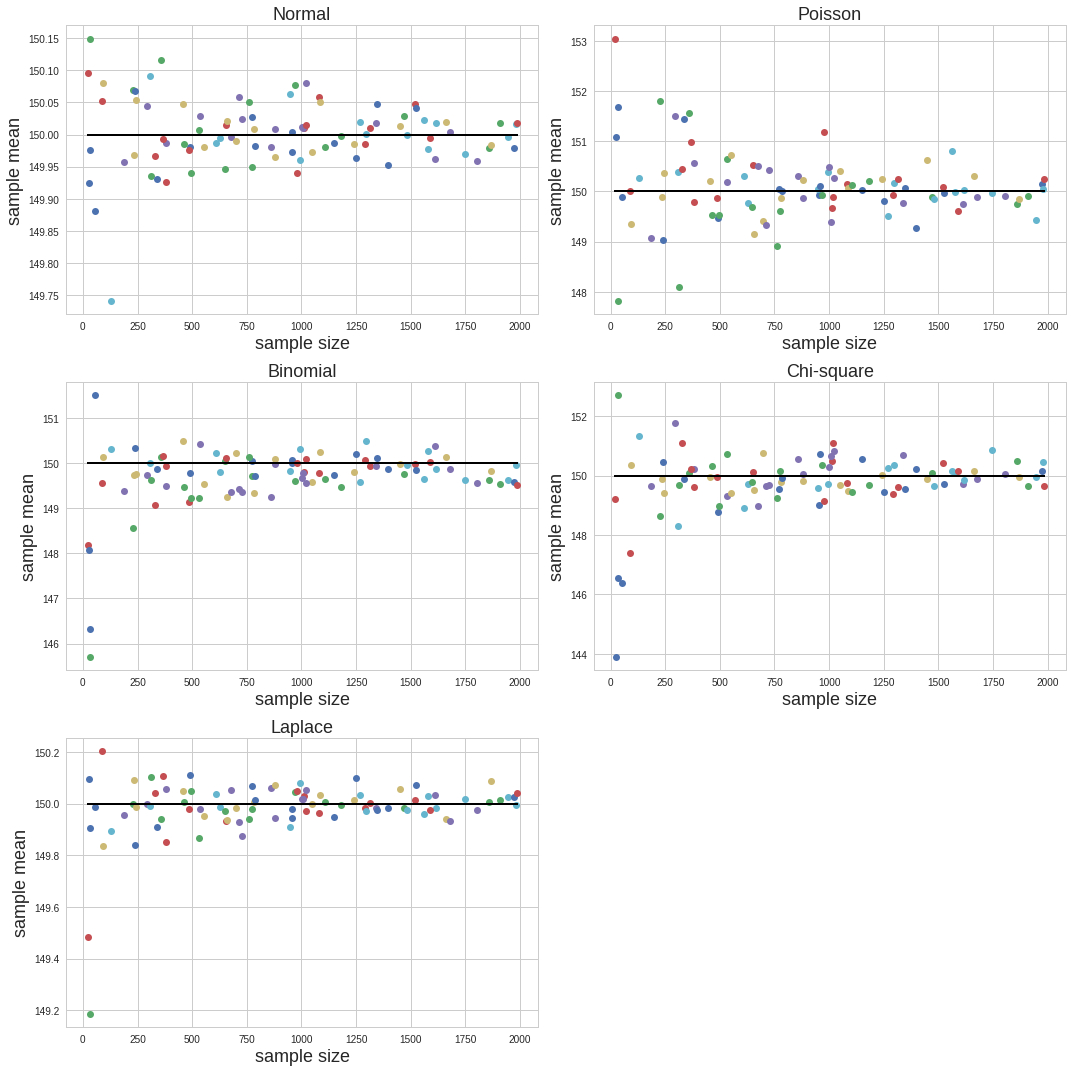

In [10]:
ax = {}
fig = pl.figure(figsize=(15,15))

i = 1
for x in distributions:
    ax[x] = fig.add_subplot(3, 2, i)
    i = i+1
    for nn in dist[x]:
        if not type(nn) == str:
            dist[x]['means'][nn] = dist[x][nn].mean()
            ax[x].plot(nn, dist[x]['means'][nn], 'o')
            ax[x].set_xlabel('sample size', fontsize=18)
            ax[x].set_ylabel('sample mean', fontsize=18)
            ax[x].set_title(x, fontsize=18)
            ax[x].plot([min(sizes), max(sizes)], [mean, mean], 'k')
            
pl.tight_layout()

### Figure 1. Based on the plots of the different distributions above, it is seens that the larger the sample size, the closer it is to the sample mean given. The smaller the sample size, the farther away it is from the sample mean of 150.

_This clearly shows with the Law of Large numbers which states that "the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed" (Wikipedia, 2017)._

# Histogram of all the sample means

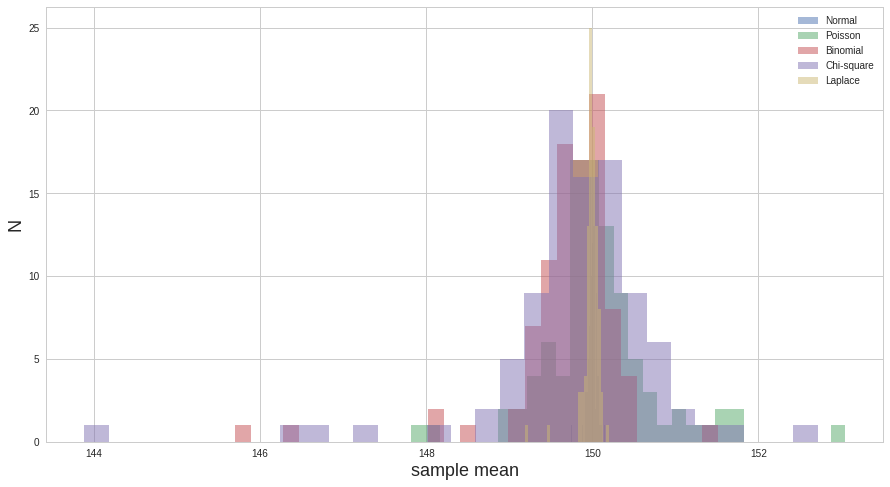

In [11]:
ax_means = pl.figure(figsize=(15,8)).add_subplot(111)
allmeans = []
for x in distributions:
    means = list(dist[x]['means'].values())
    allmeans.append(means)
    ax_means.hist(means, bins=30, alpha=0.5, label=x)
    ax_means.set_xlabel('sample mean', fontsize = 18)
    ax_means.set_ylabel('N', fontsize = 18)
    ax_means.legend()

## Figure 2: In this figure of all the sample means,  it can be seen that all the distributions overlay and meet at the center ($\mu = 150$).

Based on Wikipedia (2017), "the Central Limit Theorem establishes that, in most situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (a bell curve) even if the original variables themselves are not normally distributed".

In [12]:
# Make allmeans into a numpy array and flatten for plotting
allmeans = np.array(allmeans)
allmeans = allmeans.flatten()

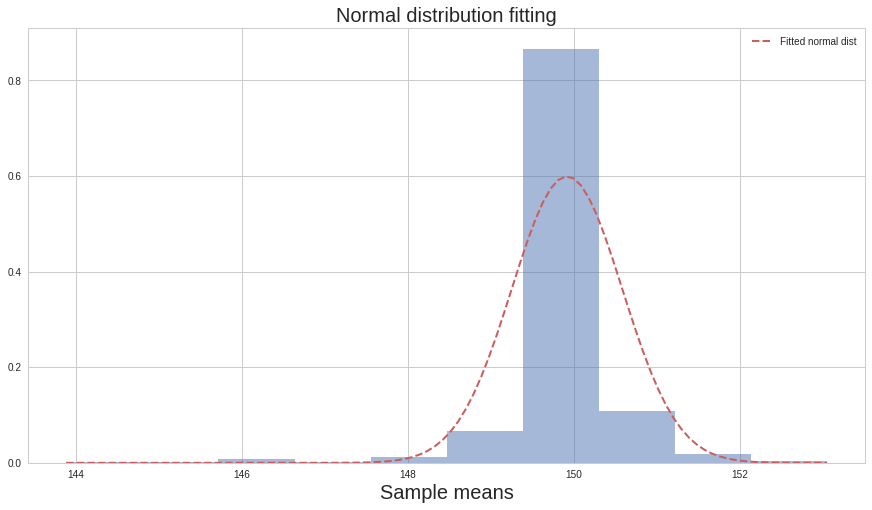

In [13]:
# Reference:
# http://firsttimeprogrammer.blogspot.com/2014/07/how-to-fit-data-to-normal-distribution.html
parameters = nm.fit(allmeans)

x = np.linspace(allmeans.min(), allmeans.max(), 100)

# Generate the pdf (fitted distribution)
fitted_pdf = nm.pdf(x,loc = parameters[0],scale = parameters[1])

fitted_fig = pl.figure(figsize=(15,8))
ax0 = fitted_fig.add_subplot(111)

ax0.plot(x, fitted_pdf, color="IndianRed", label="Fitted normal dist",
         linestyle="dashed", linewidth=2)
ax0.hist(allmeans,normed=1, alpha=0.5) 
ax0.set_title("Normal distribution fitting", fontsize=20)
ax0.set_xlabel("Sample means", fontsize=20)
ax0.legend()

## Figure 3. All sample means plotted as a histogram, with the fitted Gaussian distribution of all sample means shown as the red dashed line.